In [1]:
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/gautamchoudhary/miniconda3/envs/myenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# dataset = 'synthetic_iid'
dataset = 'old-nist-v1'
file_name1 = f'../results/{dataset}/metrics_random_0_fedavg_0.01_1_0.json'
file_name2 = f'../results/{dataset}/metrics_lossbased_0_fedavg_0.01_1_0.json'
file_name3 = f'../results/{dataset}/metrics_submodular_0_fedavg_0.01_1_0.json'

with open(file_name1, 'r') as f:
    df1 = json.load(f)
    
with open(file_name2, 'r') as f:
    df2 = json.load(f)
    
with open(file_name3, 'r') as f:
    df3 = json.load(f)

In [11]:
df1.keys()

dict_keys(['trainer', 'dataset', 'model', 'num_rounds', 'eval_every', 'clients_per_round', 'batch_size', 'num_epochs', 'num_iters', 'learning_rate', 'mu', 'seed', 'drop_percent', 'clientsel_algo', 'Ls0', 'sim_metric', 'm_interval', 'model_params', 'accuracies', 'train_accuracies', 'client_computations', 'bytes_written', 'bytes_read', 'debug'])

In [12]:
df1['debug'].keys()

dict_keys(['test_accuracies', 'test_losses', 'test_per_client_accuracies', 'test_acc_10quant', 'test_acc_20quant', 'test_acc_mean', 'test_acc_var', 'train_accuracies', 'train_losses', 'train_per_client_accuracies'])

In [5]:
def plot_figure(dataset, num_clients_per_round, 
                x, y1, y1_label, y2, y2_label, y3, y3_label, 
                x_axis_label="# Rounds", y_axis_label=None,
                degree_of_smoothness=None):
    if degree_of_smoothness:
        # ref: https://stackoverflow.com/a/46634139
        poly1 = np.polyfit(x, y1, degree_of_smoothness)
        poly_y1 = np.poly1d(poly1)(x)

        poly2 = np.polyfit(x, y2, degree_of_smoothness)
        poly_y2 = np.poly1d(poly2)(x)

        poly3 = np.polyfit(x, y3, degree_of_smoothness)
        poly_y3 = np.poly1d(poly3)(x)

        plt.plot(poly_y1, label=y1_label, color='blue')    
        plt.plot(poly_y2, label=y2_label, color='cyan')
        plt.plot(poly_y3, label=y3_label, color='red')
    else:
        plt.plot(y1, label=y1_label, color='blue')
        plt.plot(y2, label=y2_label, color='cyan')
        plt.plot(y3, label=y3_label, color='red')

    plt.title(f"{dataset}: Num. of Selected Clients K={num_clients_per_round}")
    if x_axis_label:
        plt.xlabel(x_axis_label)
    if y_axis_label:
        plt.ylabel(y_axis_label)
    plt.legend()

### Figure 1: Synthetic IID

```bash
python main.py --dataset=synthetic_iid --trainer=fedavg  \
    --learning_rate=0.01 --num_rounds=300 \
    --eval_every=1 --batch_size=10 \
    --num_epochs=1 \
    --model=mclr \
    --drop_percent=0 \
    --clients_per_round=10 \
    --m_interval=1 \
    --clientsel_algo=submodular
...
    --clientsel_algo=lossbased
    --clientsel_algo=random
```

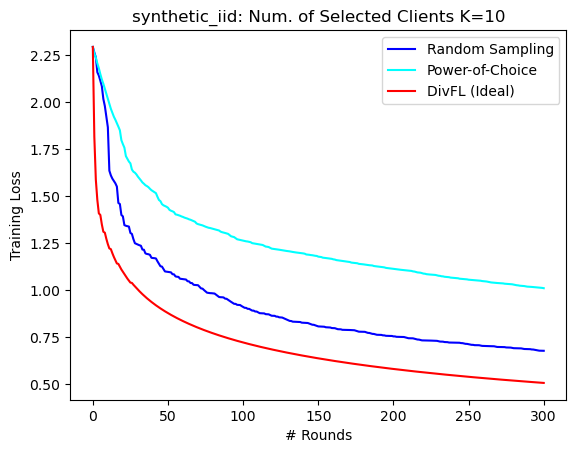

In [6]:
metric='train_losses'

plot_figure(
    dataset=df1['dataset'],
    num_clients_per_round=df1['clients_per_round'],
    x=list(range(df1['num_rounds']+1)),
    y1=df1['debug'][metric], y1_label='Random Sampling',
    y2=df2['debug'][metric], y2_label='Power-of-Choice',
    y3=df3['debug'][metric], y3_label='DivFL (Ideal)',
    y_axis_label="Training Loss"
)

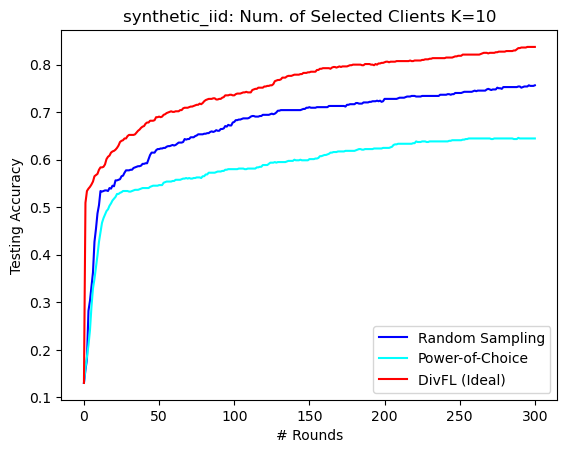

In [7]:
metric='test_accuracies'

plot_figure(
    dataset=df1['dataset'],
    num_clients_per_round=df1['clients_per_round'],
    x=list(range(df1['num_rounds']+1)),
    y1=df1['debug'][metric], y1_label='Random Sampling',
    y2=df2['debug'][metric], y2_label='Power-of-Choice',
    y3=df3['debug'][metric], y3_label='DivFL (Ideal)',
    y_axis_label="Testing Accuracy"
)

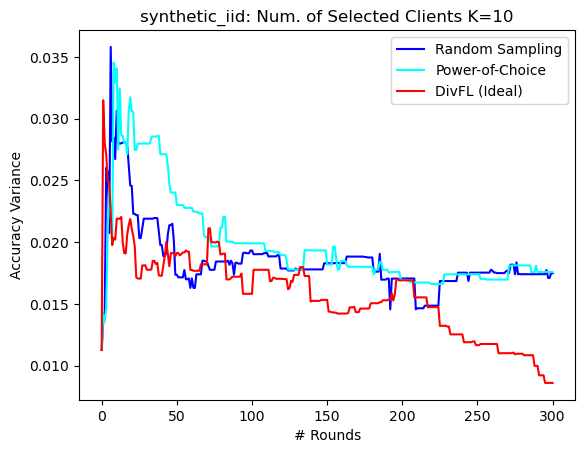

In [8]:
metric='test_acc_var'

plot_figure(
    dataset=df1['dataset'],
    num_clients_per_round=df1['clients_per_round'],
    x=list(range(df1['num_rounds']+1)),
    y1=df1['debug'][metric], y1_label='Random Sampling',
    y2=df2['debug'][metric], y2_label='Power-of-Choice',
    y3=df3['debug'][metric], y3_label='DivFL (Ideal)',
    y_axis_label="Accuracy Variance"
)

### Figure 3,4 (a): FEMNIST

```bash
python main.py --dataset=nist --trainer=fedavg  \
    --learning_rate=0.01 --num_rounds=200 \
    --eval_every=1 --batch_size=10 \
    --num_epochs=1 \
    --model=cnn \
    --drop_percent=0 \
    --clients_per_round=10 \
    --m_interval=1 \
    --clientsel_algo=submodular
...
    --clientsel_algo=lossbased
    --clientsel_algo=random
```


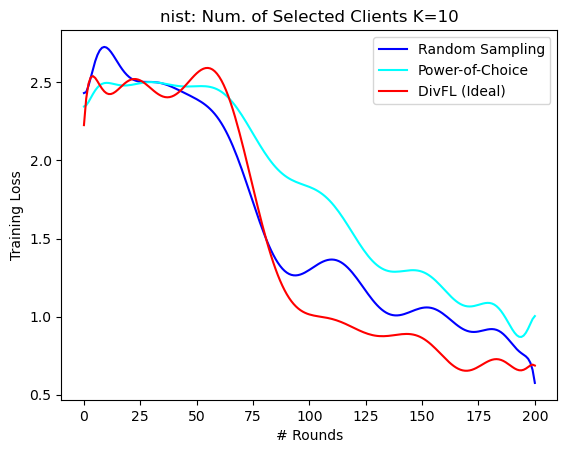

In [13]:
metric='train_losses'

plot_figure(
    dataset=df1['dataset'],
    num_clients_per_round=df1['clients_per_round'],
    x=list(range(df1['num_rounds']+1)),
    y1=df1['debug'][metric], y1_label='Random Sampling',
    y2=df2['debug'][metric], y2_label='Power-of-Choice',
    y3=df3['debug'][metric], y3_label='DivFL (Ideal)',
    y_axis_label="Training Loss",
    degree_of_smoothness=15
)

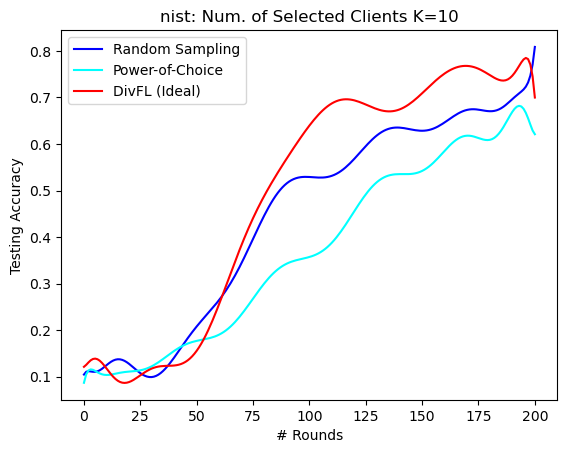

In [14]:
metric='test_accuracies'

plot_figure(
    dataset=df1['dataset'],
    num_clients_per_round=df1['clients_per_round'],
    x=list(range(df1['num_rounds']+1)),
    y1=df1['debug'][metric], y1_label='Random Sampling',
    y2=df2['debug'][metric], y2_label='Power-of-Choice',
    y3=df3['debug'][metric], y3_label='DivFL (Ideal)',
    y_axis_label="Testing Accuracy",
    degree_of_smoothness=15
)

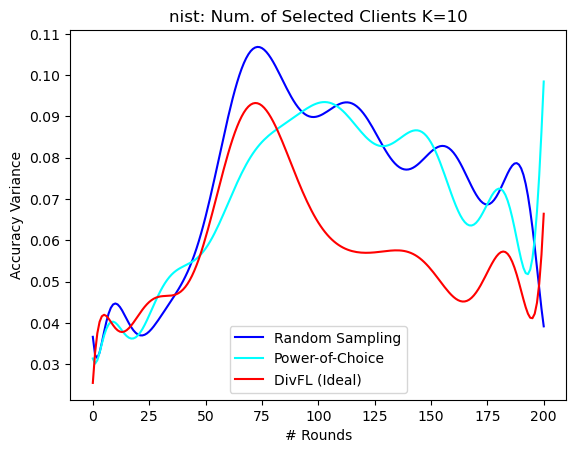

In [15]:
metric='test_acc_var'

plot_figure(
    dataset=df1['dataset'],
    num_clients_per_round=df1['clients_per_round'],
    x=list(range(df1['num_rounds']+1)),
    y1=df1['debug'][metric], y1_label='Random Sampling',
    y2=df2['debug'][metric], y2_label='Power-of-Choice',
    y3=df3['debug'][metric], y3_label='DivFL (Ideal)',
    y_axis_label="Accuracy Variance",
    degree_of_smoothness=15
)

## Rough

<AxesSubplot:ylabel='test_accuracies'>

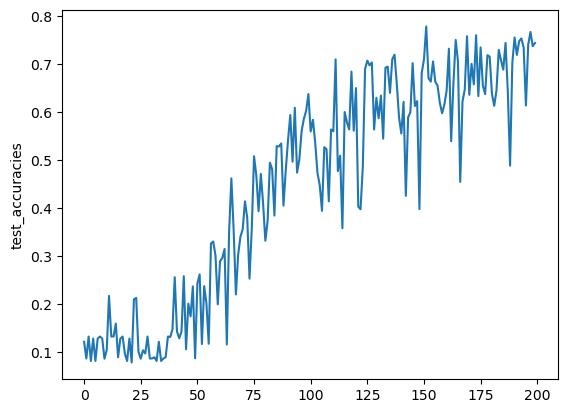

In [15]:
sns.lineplot(data=df3, y='test_accuracies', x=df1.index)

<AxesSubplot:ylabel='train_losses'>

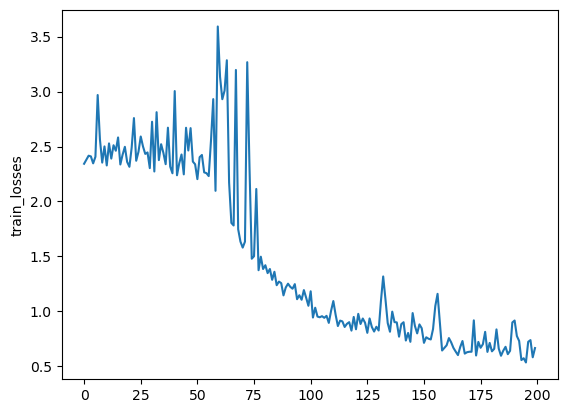

In [17]:
sns.lineplot(data=df, y='train_losses', x=df.index)